# Quasiconvex functions

$f:X\rightarrow\mathbb{R}$ is *quasiconvex* if $dom(f)$ is convex and all sublevel sets are convex, i.e., for each value $\alpha\in\mathbb{R}$, the set
$$S_{\alpha}=\{x\mid f(x)\le \alpha\}$$
is convex.

$f$ is *quasiconcave* if $-f$ is quasiconvex. If $f$ is both quasiconvex and quasiconcave, then we call $f$ *quasilinear*.

Recall that a convex function has convex level sets, hence it is quasiconvex.

## Exercise 1

Show that if $f$ is quasilinear then all its level sets are convex. (For $\alpha\in\mathbb{R}$, the set
$S_{\alpha}=\{x\mid f(x)= \alpha\}$ is the $\alpha$ level set.)

## Exercise 2
- characterize quasilinear functions $\mathbb{R}\rightarrow\mathbb{R}$.
- $f(x)/g(x)$ is quasiconvex for $f$ nonnegative convex and $g$ positive concave.
- $f(x)/g(x)$ is quasiconvex for $f$ convex and $g$ affine.

## Exercise 3

For $x\in\mathbb{R}^n$ define *length of $x$* as $f(x)=\max\{i\mid x_i\ne 0\}$ for $x\ne 0$ and $f(0)=0$. Show that $f$ is not convex but it is quasiconvex.

## Exercise 4
Is $f(xy)=xy$ for $x,y>0$ convex/concave? Is it quasiconvex/quasiconcave?

## Exercise 5 (quasiconvex Jensen)

Prove the following.

Let $dom(f)$ be convex.
Then, $f$ is quasiconvex iff for all $x,y\in dom(f)$ and $\lambda\in[0,1]$, we have
$$f(\lambda x+ (1-\lambda)y) \le \max\{f(x),f(y)\}.$$

Similarly, $f$ is quasiconcave iff for all $x,y\in dom(f)$ and $\lambda\in[0,1]$, we have
$$f(\lambda x+ (1-\lambda)y) \ge \min\{f(x),f(y)\}.$$

## Exercise 6

For $x\in\mathbb{R}^n$ define $card(x)=|\{i\mid x_i\ne 0\}|$. Then $card$ is concave on $\mathbb{R}_+^n$.

## Exercise 7
A *quasiconvex problem* is minimizing a quasiconvex function over a set of convex constraints. Show that quasiconvex problems can be solved up to arbitrary precision using binary search and solving a number of convex feasibility problems.

## Programming Exercise (minimizing a quasiconvex function)
Let's say we want to find a function of the form $$f(t)=\frac{a_0+ a_1 t + a_2 t^2 }{1+ b_1 t+ b_2 t^2}$$ which approximates $e^t$ on the set $[-3,3]$. To this end, we will find the values of the $a_i$ and $b_i$ coefficients so that they minimize $\max_{i=1,\ldots,k} | f(t_i)-y_i|$, where $t_i$ are evenly spaced numbers in $[-3,3]$. We will require that $1+b_1 t_i+ b_2 t_i^2 \ge \varepsilon$ for $i=1, \ldots, k$ and some $\varepsilon$, say $\varepsilon=10^{-8}$.

Argue that this is a quasiconvex problem, and use Exercise 7 to implement its solution. You can use ```cvxpy``` (or an LP solver of your choice).

Hint: ```p = cp.Parameter()``` creates a parameter which you can use in your model. Then, you can solve the same model multiple times with different values of ```p```, changed by ```p.value = ...```.

**Note:** In principle ```cvxpy``` can solve a quasiconvex problem for you (also using binary search) if you call ```prob.solve(qcp=True)```. Then, your problem has to be specified as DQCP ([Disciplined Quasiconvex Programming](https://www.cvxpy.org/tutorial/dqcp/index.html)) which is not very convenient for us.

In [42]:
import numpy as np
import cvxpy as cp
import math

In [43]:
k = 201
t = np.linspace(-3,3,k)
y = [math.exp(x) for x in t]

In [46]:
M = cp.Parameter(nonneg=True, name='M')

a = cp.Variable(3, name='a')
b = cp.Variable(2, name='b')

constraints = [
    a[0] + a[1] * t[i] + a[2] * t[i]**2 <= (M + cp.exp(t[i])) * (1 + b[0] * t[i] + b[1] * t[i]**2) 
    for i in range(len(t))
]
constraints += [
    a[0] + a[1] * t[i] + a[2] * t[i]**2 >= (cp.exp(t[i]) - M) * (1 + b[0] * t[i] + b[1] * t[i]**2) 
    for i in range(len(t))
]


obj = cp.Minimize(0)
prob = cp.Problem(obj, constraints)

l = 0
p = np.exp(3)
epsilon = 1e-16


while abs(l - p) > epsilon:
    M.value = (l + p)/2
    prob.solve(verbose=False, solver=cp.GUROBI) 
    if prob.status == cp.OPTIMAL:
        p = (l+p)/2
    else:
        l = (l+p)/2

print(f"M value: {M.value}. Solution is {cp.OPTIMAL}")


M value: 0.02272623850127966. Solution is optimal


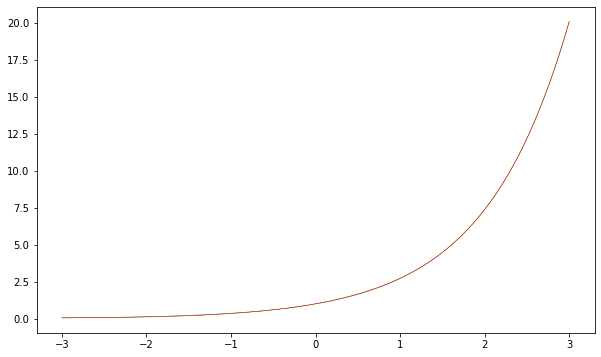

In [47]:
# here you can see how close is your function
import matplotlib.pyplot as plt
y2 = [(a[0].value + a[1].value*t[i] + a[2].value*(t[i]**2))/(1+b[0].value*t[i]+b[1].value*(t[i]**2)) for i in range(len(t))]
plt.figure(figsize=(10,6))
plt.plot(t, y, 'g-', t, y2, 'r-', linewidth=0.5)